# Plot vowels

Let's use Python to plot our extracted formant vowels and inspect our vowels spaces.
We'll start with a very simple figure, where we simply plot the raw F1 and F2 frequencies for the cardinal vowels.
Things to notice:
1. We need to import libraries
2. We use `pandas` to import and structure our data
3. We use `seaborn` to make plotting easier
4. We use `matplotlib.pyplot` to make adjustments to our figure
5. We rename libraries with abreviations

In [63]:
# import data structuring and plotting libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# read our csv file into a dataframe
df = pd.read_csv("/Users/ethan/Documents/GitHub/praat-workshop/data/cardinal_vowels/formants.csv")

# inspect the first 5 lines
df.head()

,Vowel,F1,F2,F3
0,vowels1.wav,350.801919,2392.458027,3176.248282
1,vowels2.wav,414.043567,2326.744712,2789.926437
2,vowels3.wav,695.099485,1947.917695,2767.022788
3,vowels4.wav,899.606390,1487.147618,2256.217774
4,vowels5.wav,712.226222,1114.328494,3041.588454


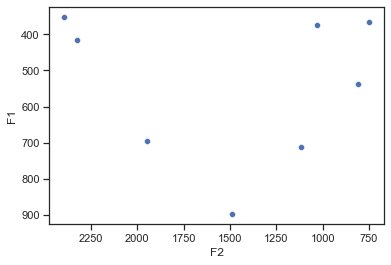

In [66]:
ax = sns.scatterplot(data=df, x=df['F2'], y=df['F1'])
ax.invert_yaxis()
ax.invert_xaxis()

vowelplot function below taken from: https://lingmethodshub.github.io/content/python/vowel-plotting-py/index.html

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

def vowelplot (vowelcsv, color=None, F1="F1", F2="F2", vowel="Vowel", title="Vowel Plot", unit="Hz", logscale=True):
  
    #Set some parameters for the chart itself
    sns.set(style='ticks', context='notebook')
    plt.figure(figsize=(6,6))
    
    # If there's an argument for color, determine whether it's likely to be categorical
    ## If it's a string (text), use a categorical color palette
    ## If it's a number, use a sequential color palette
    if color != None:
        if type(vowelcsv[color].iloc[0])==str:
            pal = "husl"
        else:
            pal = "viridis"
            
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             hue = color,
                             data = vowelcsv,
                             palette = pal)
        
    # If no color argument is given, don't specify hue, and no palette needed
    else:
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             data = vowelcsv)
    
    
    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()
    
    #Add unit to the axis labels
    F1name = str("F1 ("+unit+")")
    F2name = str("F2 ("+unit+")")
    laby = plt.ylabel(F1name)
    labx = plt.xlabel(F2name)

    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    
    # Add vowel labels
    
    if vowel != None: 
        for line,row in vowelcsv.iterrows():
            pl.text(vowelcsv[F2][line]+0.1,
                    vowelcsv[F1][line],
                    vowelcsv[vowel][line],
                    horizontalalignment = 'left',
                    size = 14, # Edit for larger plots!
                    color = 'black',
                   # weight = 'semibold' # Uncomment for larger plots!
                   )
    
    pl.set_title(title)
    pl.spines['top'].set_visible(False)
    pl.spines['right'].set_visible(False)
    plt.show()
    
    return pl

In [47]:
def barkify (data, formants):
    # For each formant listed, make a copy of the column prefixed with z
    for formant in formants:
        for ch in formant:
            if ch.isnumeric():
                num = ch
        formantchar = (formant.split(num)[0])
        name = str(formant).replace(formantchar,'z')
        # Convert each value from Hz to Bark
        data[name] = 26.81/ (1+ 1960/data[formant]) - 0.53
    # Return the dataframe with the changes
    return data

In [48]:
def Lobify (data, group, formants):
    zscore = lambda x: (x - x.mean()) / x.std()
    for formant in formants:
        name = str("zsc_" + formant)
        col = data.groupby([group])[formant].transform(zscore)
        data.insert(len(data.columns), name, col)
    return data 


In [49]:
df = pd.read_csv('/Users/ethan/Desktop/formants_BE_AmE.csv')
df.head()
vowelname = []
for i in list(df['Vowel']):
    nv = i[0:-4]
    vowelname.append(nv)
df['Vowel'] = vowelname
df.head()

,Language,Vowel,F1,F2,F3,Speaker
0,BE,1,258.615520,2202.613599,3362.927236,1
1,BE,2,355.617499,2082.039600,2949.967830,1
2,BE,3,489.886958,1912.026845,2698.226652,1
3,BE,4,626.668089,1764.347484,2438.087258,1
4,BE,5,564.694510,843.948944,2522.263304,1


In [50]:
words = ['heed', 'hid', 'head', 'had', 'hod', 'hawed', 'hood', 'whod']
df['Vowel'] = words * max(df['Speaker'])
df.head()

,Language,Vowel,F1,F2,F3,Speaker
0,BE,heed,258.615520,2202.613599,3362.927236,1
1,BE,hid,355.617499,2082.039600,2949.967830,1
2,BE,head,489.886958,1912.026845,2698.226652,1
3,BE,had,626.668089,1764.347484,2438.087258,1
4,BE,hod,564.694510,843.948944,2522.263304,1


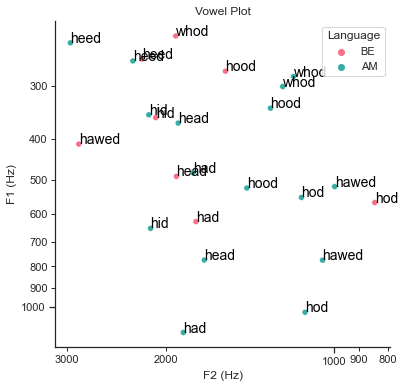

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Hz)', ylabel='F1 (Hz)'>

In [51]:
vowelplot(df, color = 'Language')

In [52]:
barkify(df, ["F1","F2"])

,Language,Vowel,F1,F2,F3,Speaker,z1,z2
0,BE,heed,258.615520,2202.613599,3362.927236,1,2.595139,13.656296
1,BE,hid,355.617499,2082.039600,2949.967830,1,3.587306,13.279732
2,BE,head,489.886958,1912.026845,2698.226652,1,4.831010,12.708916
3,BE,had,626.668089,1764.347484,2438.087258,1,5.965217,12.170790
4,BE,hod,564.694510,843.948944,2522.263304,1,5.466551,7.539431
5,BE,hawed,410.870181,2859.749147,3415.833611,1,4.116155,15.377441
6,BE,hood,276.147066,1562.224348,2507.120349,1,2.780830,11.361132
7,BE,whod,227.983222,1917.582053,3316.985762,1,2.263545,12.728359
8,AM,heed,261.200784,2288.110639,2931.558194,2,2.622706,13.910360
9,AM,hid,350.278293,2142.570560,2751.998414,2,3.534861,13.471543


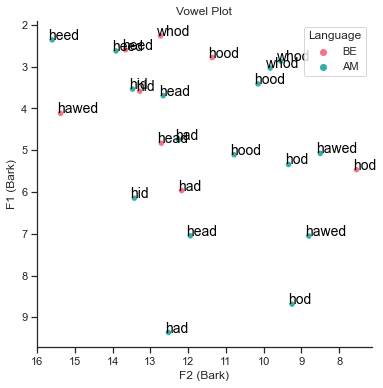

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Bark)', ylabel='F1 (Bark)'>

In [54]:
vowelplot(df,
          F1 = "z1",
          F2 = "z2",
          color = "Language",
          unit = "Bark",
          logscale = False)

In [56]:
Lobify(df, 
       group = "Speaker",
       formants = ["F1","F2"]
      )

,Language,Vowel,F1,F2,F3,Speaker,z1,z2,zsc_F1,zsc_F2
0,BE,heed,258.615520,2202.613599,3362.927236,1,2.595139,13.656296,-0.963377,0.540771
1,BE,hid,355.617499,2082.039600,2949.967830,1,3.587306,13.279732,-0.308487,0.330131
2,BE,head,489.886958,1912.026845,2698.226652,1,4.831010,12.708916,0.598008,0.033123
3,BE,had,626.668089,1764.347484,2438.087258,1,5.965217,12.170790,1.521460,-0.224869
4,BE,hod,564.694510,843.948944,2522.263304,1,5.466551,7.539431,1.103057,-1.832781
5,BE,hawed,410.870181,2859.749147,3415.833611,1,4.116155,15.377441,0.064541,1.688770
6,BE,hood,276.147066,1562.224348,2507.120349,1,2.780830,11.361132,-0.845016,-0.577973
7,BE,whod,227.983222,1917.582053,3316.985762,1,2.263545,12.728359,-1.170185,0.042828
8,AM,heed,261.200784,2288.110639,2931.558194,2,2.622706,13.910360,-1.262367,1.403784
9,AM,hid,350.278293,2142.570560,2751.998414,2,3.534861,13.471543,-0.424417,1.107759


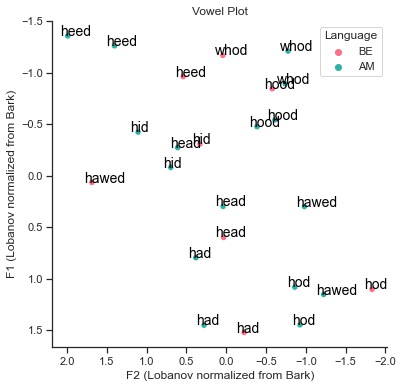

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Lobanov normalized from Bark)', ylabel='F1 (Lobanov normalized from Bark)'>

In [59]:
vowelplot(df,
          F1 = "zsc_F1",
          F2 = "zsc_F2",
          color = "Language",
          unit = "Lobanov normalized from Bark",
          logscale = False)